# LM35 mesured data analysis
## Internet of Things

Author:        Efren Del Real Frias

File Name:     tempDataAnalysis.ipynb

Date:          December 02nd 2022

NOTE:



# 1.- Python Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.spatial import distance

# 2.- Working Directory

Note: As I am working with Google Colab,  I have to move to my working directory. Since there is my measured temperature data in a *.csv file.
Plese fell free to skip next steps if you are working in a local numpy notebook or other platform

In [2]:
!pwd

/content


In [3]:
!ls

sample_data


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!ls -l

total 8
drwx------ 6 root root 4096 Dec  3 15:10 drive
drwxr-xr-x 1 root root 4096 Dec  1 20:08 sample_data


In [6]:
%cd /content/drive/MyDrive/1_Master/3_Semester/2_IoT/221201_FinalProject/udgS3IoT/doc/01_csvAnalysis/

/content/drive/MyDrive/1_Master/3_Semester/2_IoT/221201_FinalProject/udgS3IoT/doc/01_csvAnalysis


In [7]:
!ls -l

total 606
-rw------- 1 root root 536404 Dec  1 16:21 221130_TemperatureData_v1.csv
-rw------- 1 root root  83702 Dec  3 15:10 tempDataAnalysis.ipynb


# 3.- Read *.csv as Pandas DataFrame

In [8]:
# Reads csv file as pandas dataFrame object
tempData_df = pd.read_csv( '221130_TemperatureData_v1.csv' )

In [9]:
tempData_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28231 entries, 0 to 28230
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TimeStamp    28231 non-null  object
 1   Temperature  28231 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 441.2+ KB


In [10]:
# Since I  added a factor (100) before transmit data to Blynk service in order
# to avoid working with float data,  Temperature must translate in order to get
# °C
tempData_df.Temperature = tempData_df.Temperature / 100

In [11]:
tempData_df.head()

,TimeStamp,Temperature
0,10:25:01.218,10.80
1,10:25:04.213,11.05
2,10:25:07.205,10.93
3,10:25:10.198,10.74
4,10:25:13.226,10.89


# 4.- Plot measured data

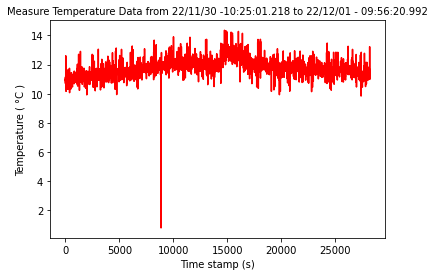

In [ ]:
# Plots measured temperature data
plt.plot( tempData_df.index.values, tempData_df.Temperature.values, color = 'red' )
plt.title( f'Measure Temperature Data from 22/11/30 -{ tempData_df.TimeStamp.iloc[0] } to 22/12/01 - { tempData_df.TimeStamp.iloc[-1] }', fontsize = 10 )
plt.ylabel('Temperature ( °C )')
plt.xlabel('Time stamp (s)')
plt.show()

# 5.- Measured temperature statistics

In [12]:
# Describe statistics for Temperature Variable
tempData_df.Temperature.describe()

count    28231.000000
mean        11.790101
std          0.428408
min          0.800000
25%         11.590000
50%         11.700000
75%         12.010000
max         14.350000
Name: Temperature, dtype: float64

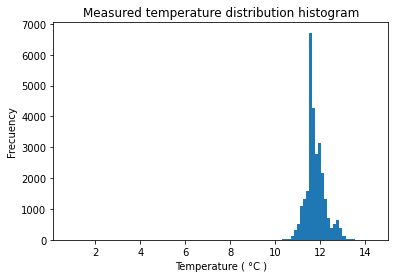

In [13]:
counts, bins = np.histogram( tempData_df.Temperature.values, bins=100 )
plt.hist( bins[:-1], bins, weights=counts )
plt.title('Measured temperature distribution histogram')
plt.xlabel('Temperature ( °C )')
plt.ylabel('Frecuency')
plt.show() 

In [14]:
counts

array([   1,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          1,    3,    2,    9,   12,   19,   26,  120,  314,  507, 1107,
       1326, 1572, 6715, 4282, 2767, 3146, 2157, 1317,  701,  368,  524,
        642,  390,  137,   22,   15,   11,    3,    4,    2,    1,    3,
          5])

In [15]:
bins

array([ 0.8   ,  0.9355,  1.071 ,  1.2065,  1.342 ,  1.4775,  1.613 ,
        1.7485,  1.884 ,  2.0195,  2.155 ,  2.2905,  2.426 ,  2.5615,
        2.697 ,  2.8325,  2.968 ,  3.1035,  3.239 ,  3.3745,  3.51  ,
        3.6455,  3.781 ,  3.9165,  4.052 ,  4.1875,  4.323 ,  4.4585,
        4.594 ,  4.7295,  4.865 ,  5.0005,  5.136 ,  5.2715,  5.407 ,
        5.5425,  5.678 ,  5.8135,  5.949 ,  6.0845,  6.22  ,  6.3555,
        6.491 ,  6.6265,  6.762 ,  6.8975,  7.033 ,  7.1685,  7.304 ,
        7.4395,  7.575 ,  7.7105,  7.846 ,  7.9815,  8.117 ,  8.2525,
        8.388 ,  8.5235,  8.659 ,  8.7945,  8.93  ,  9.0655,  9.201 ,
        9.3365,  9.472 ,  9.6075,  9.743 ,  9.8785, 10.014 , 10.1495,
       10.285 , 10.4205, 10.556 , 10.6915, 10.827 , 10.9625, 11.098 ,
       11.2335, 11.369 , 11.5045, 11.64  , 11.7755, 11.911 , 12.0465,
       12.182 , 12.3175, 12.453 , 12.5885, 12.724 , 12.8595, 12.995 ,
       13.1305, 13.266 , 13.4015, 13.537 , 13.6725, 13.808 , 13.9435,
       14.079 , 14.2

In [16]:
# Since almost first 66 "counts" elements are zero.
# we use an index offset in order to visualize the histogram better
startIdx : int = 66

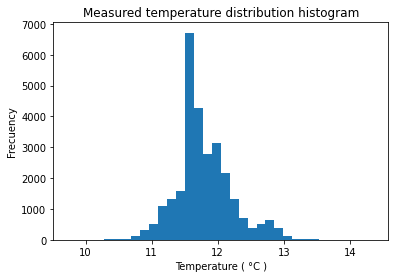

In [17]:
counts, bins = np.histogram( tempData_df.Temperature.values, bins=100 )
plt.hist( bins[ startIdx : -1 ], bins[ startIdx : ], weights=counts[ startIdx : ] )
plt.title('Measured temperature distribution histogram')
plt.xlabel('Temperature ( °C )')
plt.ylabel('Frecuency')
plt.show() 

#6.- Temperature movement behaviour

## 6.1 .-
$$
Euclidean(A, B) = \sqrt{(x_{2} - x_{1})^2  + (y_{2} - y_{1})^2}
$$

$where:$  


*   $A(x_{1}, y_{1})$
*   $B(x_{2}, y_{2})$

In [28]:
################################################################################
# compute_pathLenght
################################################################################
def compute_pathLenght( aMeasuredVar  ):
  """
  Arguments:
        aMeasuredVar: np.array  - Array Measured Variable (rows = n, columns = 1)

  Returns:
        aPathLen: np.array  - Path Lenght numpy array size(rows = n, columns = 1)

  See:
        https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.euclidean.html
  """
  disEuclidean = np.array([ distance.euclidean( aMeasuredVar[ i - 1 ], aMeasuredVar[ i ] )
                            for i in range( 1, aMeasuredVar.shape[ 0 ] ) ])
  aPathLen = np.cumsum( disEuclidean )

  return aPathLen

In [29]:
tempPathLen = compute_pathLenght( tempData_df.Temperature.values )


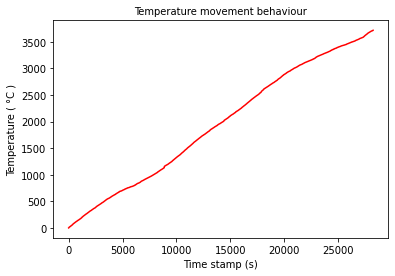

In [97]:
# Plots temperature
plt.plot(  np.arange( len( tempPathLen ) ), tempPathLen, color = 'red' )
plt.title( f'Temperature movement behaviour', fontsize = 10 )
plt.ylabel( 'Temperature ( °C )' )
plt.xlabel( 'Time stamp (s)' )
plt.show()